In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

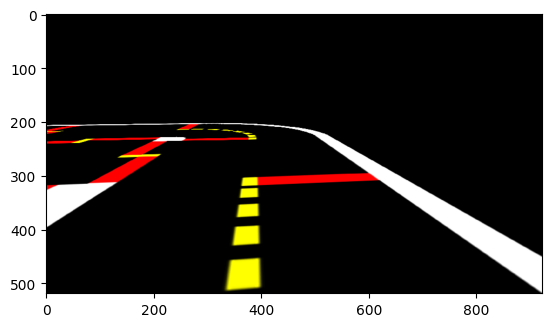

In [2]:
# Get RGB Image
# img = cv.imread('./sim_testing_images/straight.png')
img = cv.imread('./sim_testing_images/straight_before_turn.png')

rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(rgb_img)

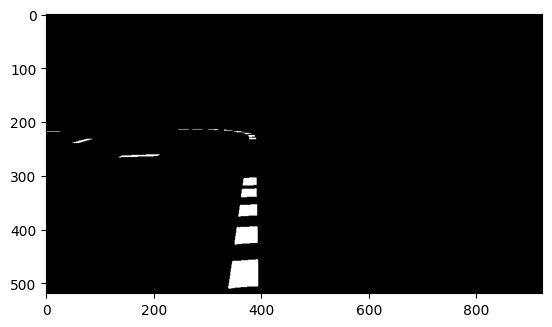

In [3]:
# Get grayscale image with only centerline (yellow colors)
lower_yellow = np.array([240,240,0])
upper_yellow = np.array([255,255,0])
centerline_gray_img = cv.inRange(rgb_img, lower_yellow, upper_yellow) # get only yellow colors in image

plt.imshow(centerline_gray_img, cmap='gray')

In [4]:
# Get Contours for center line blobs
contours, hierarchy = cv.findContours(centerline_gray_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# cv.drawContours(rgb_img, contours, -1, (0,255,0), 2)

# cv.namedWindow('Contours', cv.WINDOW_NORMAL)
# cv.imshow('Contours', rgb_img)
# if cv.waitKey(0):
#     cv.destroyAllWindows()

In [16]:
centers = []
for i in contours:
    M = cv.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        if cy > rgb_img.shape[0]//2:
            cv.drawContours(rgb_img, [i], -1, (0,255,0), 2)
            cv.circle(rgb_img, (cx, cy), 7, (0, 0, 255), -1)
            centers.append((cx, cy))
            print(f"x: {cx}, y: {cy}")

cv.namedWindow('Contours', cv.WINDOW_NORMAL)
cv.imshow('Contours', rgb_img)
if cv.waitKey(0):
    cv.destroyAllWindows()


x: 368, y: 483
x: 372, y: 411
x: 375, y: 364
x: 377, y: 332
x: 378, y: 311
x: 174, y: 263


# PID Control 

In [23]:
from simple_pid import PID

pid = PID()
pid.Ki = -.01*0
pid.Kd = -.5*0
pid.Kp = -30/300 #degrees per pixel
pid.sample_time = 1/30.0
pid.output_limits = (-30,30)

#set point is the desired location of the blob we are trying to follow
#find blob closest to car (bottom of camera aview)
centers.sort(key = lambda x: x[1])
blobToFollowCoords = centers[-1]

#get image coords
desXCoord = rgb_img.shape[1]//2
print(f"setpoint: {desXCoord}")
pid.setpoint = desXCoord

steeringAngle = pid(blobToFollowCoords[0])
print(f"input: {blobToFollowCoords[0]}")
print(steeringAngle)

#send to car


setpoint: 461
input: 368
-9.3


In [ ]:
30/